## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we setup
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')  #Reading the dataset

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info() #To get a glimpse of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.drop_duplicates(subset = ["user_id"])
#Getting the number of unique users by dropping the duplicates and finding the number of rows which equals 290584

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


d. The proportion of users converted.

In [5]:
(df['converted'] == 1).mean() 
#The best way to get the proportion is by using the mean function to calculate the number of conversion/total number

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
(df.query('landing_page == "new_page"')['group'] == 'control').value_counts() + (df.query('landing_page == "old_page"')['group'] == 'treatment').value_counts()
#The ordinary thing is that new page lines up with treatment and old page with control so we used the opposite conditions with value_counts

False    290585
True       3893
Name: group, dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()[0]
#It was obvious from the info() function that we used earlier there were no null values and we made sure by using isnull()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)  
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)
df.to_csv('new_dataset.csv', index=False)
#Dropping the values in which the new_page and treatment don't line up and storing it to a new dataset

In [9]:
df2 = pd.read_csv('new_dataset.csv')
df2.info()
#Reading the new dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['landing_page'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

145311

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2["user_id"].value_counts().count()
#value_counts() for finding the unique values and count() for finding the total number

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2["user_id"].value_counts()
#value_counts() for displaying the unique users and it's obvious that we have a duplicated user_id which is "773192"

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.loc[df2['user_id'] == 773192]
# Same user has logged on to the website twice as we can see from the different timestamp

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(inplace = True)
#Dropping one of the iterations

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
(df2.loc[df2['converted'] == 1].count()/df2['converted'].count())[0]
#Finding the probability by dividing the number of conversions / total number of conversions and non conversions

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
(df2.query('group == "control"')['converted'] == 1).mean()
#Finding the probability in case of control group by using mean() function instead of counting and dividing by the total

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
(df2.query('group == "treatment"')['converted'] == 1).mean()
#Finding the probability in case of treatment group by using mean() function instead of counting and dividing by the total

0.11880724790277405

d. What is the probability that an individual received the new page?

In [18]:
(df2.loc[df2['landing_page'] == "new_page"].count()/df2['landing_page'].count())[0]
#Finding the probability by dividing the number of new pages / total number of landing pages

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From question d, it is very obvious that the probability of receiving the new page is approximately 0.5 which means that the probability of receiving the old page is 0.5 too and the experiment is not biased at all in other wards the number of receiving old page is equal to the number of receiving the new page, and when we look at questions c and b we can conclude that the probability of converting the control group which is aligned with the old page is approximately 12.04% while the probability of converting the treatment group which is aligned with the new page is roughly 11.88% so the new treatment doesn't lead to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

                                     H0: P new - P old <= 0
                                     H1: P new - P old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
P_new = df2.converted.mean()
P_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
P_old = df2.converted.mean()
P_old

0.11959667567149027

c. What is $n_{new}$?

In [21]:
n_new = (df2.query('group == "treatment"')).count()[0]
n_new

145311

d. What is $n_{old}$?

In [22]:
n_old = (df2.query('group == "control"')).count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(1, P_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1, P_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.0023293155916593866

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = [] #An array for filling it with the difference between converted new and old pages

new_page_converted = np.random.binomial(n_new,P_𝑛𝑒𝑤,10000)/n_new
old_page_converted = np.random.binomial(n_old,P_old,10000)/n_old
p_diffs = new_page_converted - old_page_converted 
p_diffs

array([ 0.00145604,  0.0013049 , -0.00088367, ..., -0.00098708,
       -0.00047107, -0.0009664 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

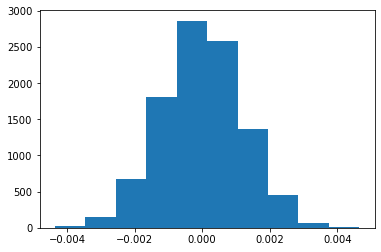

In [27]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

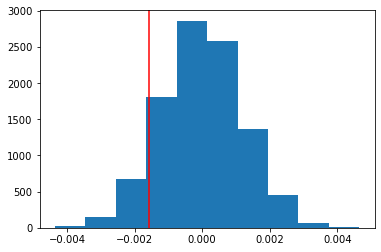

In [28]:
obs_diff = df2[df2.group == 'treatment'].converted.mean() - df2[df2.group == 'control'].converted.mean()

plt.hist(p_diffs);
plt.axvline(obs_diff, color='r'); #For plotting the observed difference in red colour

In [29]:
(p_diffs >= obs_diff).mean()
#p-value approximately equals 1 so we fail to reject the null hypothesis and it means that the new page has no effect

0.9054

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It's called p-value and it indicates the probability of observing our statistic or a more extreme statistic from the null hypothesis. For example if p-value equals 1 then we fail to reject the null hypothesis and when it equals 0 we can reject the null hypthesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = (df2.query('group == "control"')['converted'] == 1).sum()
convert_new = (df2.query('group == "treatment"')['converted'] == 1).sum()
n_old = (df2.query('group == "control"')).count()[0]
n_new = (df2.query('group == "treatment"')).count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.905173705140591)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score is the standard deviation from the mean and p-value and it indicates the probability of observing our statistic or a more extreme statistic from the null hypothesis. Both values agree with the previous results as p values are almost the same. The p-value is also > 0.05 which means the null hypothesis is strong and we fail to reject it.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2.head()
#To remember our dataset columns 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [33]:
df2['intercept'] = 1 #Addig the intercept column of value equals 1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group']) #Getting the dummies to be able to deal with the categorical data
df2.drop(labels=['control'], axis=1, inplace=True) 
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary() #P-value for the ab_page > 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:               8.085e-06
Time:                        14:00:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value equals 0.190. The p-value differs because of the difference of the difference between the null and alternative hypotheses between part one and part two**

**In part two:
                                   H0: P new - P old <= 0
                                   H1: P new - P old > 0**
                                   
                                   
**In part three:
The main null hypothesis of a logistic regression is that there is no association between the response and the term.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors like social background and educational background would be a good idea and it would help us understand our model more and how to increase the conversion rate. The disadvantage is that not all the new factors would be useful for predicting and it would lead to difficulties when we create our model**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
df_new.head() #Displaying the new dataset to understand it

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [38]:
df_new['country'].value_counts() #To know the unique countries

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [39]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.drop(labels=['country'], axis=1, inplace=True)
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [40]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'CA']])
results = logit_mod.fit()
### Fitting the model

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [41]:
#Obtaining the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:               2.324e-05
Time:                        14:00:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

#### Interpretation
It is very clear that the P-value > 0.05 which means that the country is not statistically significant and had no impact on conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'CA', 'UK_ab_page', 'CA_ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:               3.483e-05
Time:                        14:00:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

###### Interpretation
 The p-value for the interactions between the page and the country are more than 0.05 ,eg. the p-value for UK_ab_page equals 0.238 and for CA_ab_page equals 0.383, so we can say that both interactions are not statistically significant and has no impact on the conversion rate

# Conclusion

**P-Value in our model > 0.05 which means that both the new page and countries are statistically insignificant factors. We fail to reject the null hypothesis in that case.**

**There was no different between the results of regression and the results of our model in part two**

**There is no need to use the new page**